In [84]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [85]:
N = 280 
rng = np.random.default_rng()

Machine = pd.DataFrame({"Years in Production": rng.integers(0,10, size=100), "Batches Produced": rng.integers(0, 10, size =100),})

In [86]:
Machine ['Units Planned'] = Machine ['Batches Produced'] * N

In [87]:
n1 = random.uniform(0, 0.0001)
n2 = random.uniform(0, 0.05)
n3 = random.uniform(0, 0.1)
Machine.loc[Machine["Years in Production"] <= 2, 'Scrap Rate'] =n1
Machine.loc[Machine["Years in Production"] > 2, 'Scrap Rate'] = n2
Machine.loc[Machine["Years in Production"] >= 7, 'Scrap Rate'] = n3

In [88]:
Machine['Units Scrapped'] = Machine ['Units Planned'] * Machine ['Scrap Rate']

In [89]:
Machine ['Units Shipped'] = Machine ['Units Planned'] - Machine ['Units Scrapped']

In [90]:
Machine ['Percentage Yield'] = Machine ["Units Shipped"] / Machine ["Units Planned"]

In [91]:
Machine.loc[Machine['Units Shipped'] == 0, 'Process Classification'] = "Out of Service"
Machine.loc[Machine['Percentage Yield'] >= 0.31, 'Process Classification'] = "1 Sigma" #https://datatofish.com/if-condition-in-pandas-dataframe/
Machine.loc[Machine['Percentage Yield'] >= 0.69, 'Process Classification'] = "2 Sigma"
Machine.loc[Machine['Percentage Yield'] >= 0.933, 'Process Classification'] = "3 Sigma" 
Machine.loc[Machine['Percentage Yield'] >= 0.9938, 'Process Classification'] = "4 Sigma" #https://www.w3schools.com/python/python_conditions.asp
Machine.loc[Machine['Percentage Yield'] >= 0.99977, 'Process Classification'] = "5 Sigma"
Machine.loc[Machine['Percentage Yield'] >= 0.9999966, 'Process Classification'] = "6 Sigma"

In [92]:
Machine.round({'Units Scrapped':0,'Scrap Rate':7, 'Units Shipped':0,'Percentage Yield':7})

,Years in Production,Batches Produced,Units Planned,Scrap Rate,Units Scrapped,Units Shipped,Percentage Yield,Process Classification
0,5,8,2240,0.029509,66.0,2174.0,0.970491,3 Sigma
1,7,2,560,0.058492,33.0,527.0,0.941508,3 Sigma
2,7,1,280,0.058492,16.0,264.0,0.941508,3 Sigma
3,0,9,2520,0.000086,0.0,2520.0,0.999914,5 Sigma
4,6,2,560,0.029509,17.0,543.0,0.970491,3 Sigma
...,...,...,...,...,...,...,...,...
95,2,1,280,0.000086,0.0,280.0,0.999914,5 Sigma
96,0,4,1120,0.000086,0.0,1120.0,0.999914,5 Sigma
97,6,5,1400,0.029509,41.0,1359.0,0.970491,3 Sigma
98,2,9,2520,0.000086,0.0,2520.0,0.999914,5 Sigma


In [96]:
print (Machine["Process Classification"].value_counts())

3 Sigma           49
5 Sigma           42
Out of Service     9
Name: Process Classification, dtype: int64


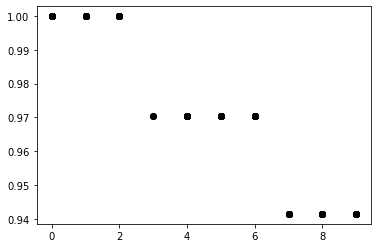

In [97]:
plt.scatter([Machine["Years in Production"]], [Machine["Percentage Yield"]], color='black');

#### End